# 機器學習 - 決策樹模型 (Decision Tree Model) (2)
- 學期: 111 機器學習 Summer Session 教材 (師培中心)
- 杜主民

# 決策樹模型 - 使用 sklearn 套件

## 一、建立 iris 資料集決策樹模型

In [2]:
from sklearn import tree  # 決策樹模組 tree
from sklearn import datasets
import pydotplus

### STEP 1: 載入 iris 資料集

In [3]:
iris = datasets.load_iris()

### STEP 2: 建立特徵X，與目標y

In [4]:
X = iris.data
y = iris.target

### STEP 3: 建立決策樹模型
- 使用 entropy 計算亂度

In [5]:
dTree = tree.DecisionTreeClassifier(criterion='entropy')  # 採用資訊獲利 Entropy 決定資料分割方式 

### STEP 4: 訓練決策樹模型

In [7]:
dTree = dTree.fit(X,y)

### STEP 5: 檢核訓練成果

In [8]:
dTree.score(X, y)

1.0

### STEP 6: 決策模型輸出

In [14]:
# 方法一
dot_data = tree.export_graphviz(dTree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')  # 印出決策樹至 pdf 檔案

True

In [15]:
# 方法二
import graphviz
dot_data = tree.export_graphviz(dTree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

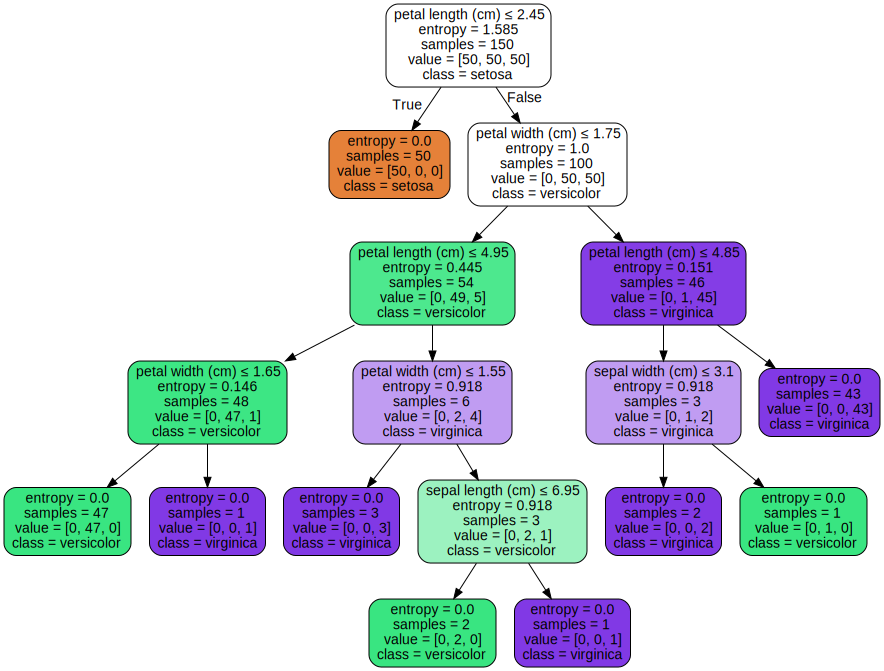

In [16]:
# 方法三
dot_data = tree.export_graphviz(dTree, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

<hr style='border-color:brown; border-width:3px'>

## 二、建立 iris 決策樹模型 - 拆分訓練資料與測試資料

In [9]:
from sklearn.model_selection import train_test_split

### STEP 1: 拆分訓練資料與測試資料

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [11]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

105
45
105
45


### STEP 2: 建立決策樹模型
- 使用 entropy 計算亂度

In [12]:
dTree = tree.DecisionTreeClassifier(criterion='entropy')

### STEP 3: 訓練決策樹模型

In [13]:
dTree = dTree.fit(X_train, y_train)

### STEP 4: 檢核訓練成果

In [14]:
dTree.score(X_train, y_train)

1.0

### STEP 5: 預測測試資料

In [30]:
dTree.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

### STEP 6: 檢核測試資料成果

In [15]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.9555555555555556


<hr style='border-color:brown; border-width:3px'>

## 三、決策樹過度配適初步調整
- 決策樹透過特徵與對應 target 將資料切分，找出最適合的分枝再繼續往下拓展。
- 但是決策數的深度愈深，其決策的規則會愈加複雜。
- 愈加複雜的模型訓練資料的 Bias 會愈低，看似會得到很好的效果，但也容易吸收過多的雜訊，造成過度擬合(Overfitting)的問題。

### 調整樹高至多三層

In [36]:
dTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dTree = dTree.fit(X_train,y_train)

In [37]:
dTree.score(X_train, y_train)

0.9809523809523809

### 上述訓練資練資料的 score 不再是 1.0，代表訓練資料比較沒有過度訓練的疑慮

In [38]:
dTree.score(X_test, y_test)

0.9555555555555556

### 輸出圖形

In [39]:
dot_data = tree.export_graphviz(dTree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris2.pdf')  # 印出決策樹至 pdf 檔案

True

<hr style='border-color:brown; border-width:3px'>

## 四、決策樹使用 Gini 亂度因子 (略過)

In [27]:
dTree = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
dTree = dTree.fit(X_train, y_train)

In [28]:
dTree.score(X_train, y_train)

0.9619047619047619

In [29]:
dTree.score(X_test, y_test)

0.9333333333333333

In [30]:
dot_data = tree.export_graphviz(dTree, out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris_gini_max_3.pdf')  # 印出決策樹至 pdf 檔案

True

In [75]:
import math

In [77]:
-1 * math.log2(2)

-1.0

In [86]:
math.log2(0.5)*(-0.5)

0.5

In [87]:
math.log2(0.5)*(-0.5)

0.5

<hr style='border-color:brown; border-width:3px'>

## 五、決策樹用藥案例 - sklearn
- 使用投影片案例的數據

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

### STEP 1: 建立資料與型別轉換

In [27]:
性別 = ['男','女','男','男','女','男','女','男','男','女','女','男']
年齡 = [20,73,37,33,48,29,52,42,61,30,26,54]
血壓 = ['正常','正常','高','低','高','正常','正常','低','正常','正常','低','高']
藥物 = ['A','B','A','B','A','A','B','B','B','A','B','A']

In [28]:
df = pd.DataFrame([性別,年齡,血壓,藥物])
df = df.T
df.columns=['性別','年齡','血壓','藥物']
data = df.copy()

In [29]:
df.head()

,性別,年齡,血壓,藥物
0,男,20,正常,A
1,女,73,正常,B
2,男,37,高,A
3,男,33,低,B
4,女,48,高,A


- 藥物是目標 target。
- 性別類別型資料，`性別`沒有順序關係，可利用 `labelEncoder` 轉換為數字，不會增加新欄位。
- 血壓也是類別型資料，但`血壓`應該可以是順序型的類別，在進行類別型態資料轉換時，可考慮使用 `OrdinalEncoder`設定血壓的數字順序。

### 性別欄位以 LabelEncoder 轉換

In [30]:
lb = LabelEncoder() # 建立 labelencoder 物件
df['性別'] = lb.fit_transform(df['性別'])

### 血壓欄位以 OrdinalEncoder 轉換

In [32]:
ode = OrdinalEncoder(categories=[['低','正常','高']])
df['血壓'] = ode.fit_transform(df[['血壓']])

In [33]:
df.head(3)

,性別,年齡,血壓,藥物
0,1,20,1.0,A
1,0,73,1.0,B
2,1,37,2.0,A


### STEP 2: 建立特徵 X，與目標 y

In [34]:
X = df[['性別','年齡','血壓']]
y = df['藥物']
#X = df.iloc[:, 0:3]
#y = df.iloc[:, 3]

In [35]:
print(X[0:3])
print('-'*30)
print(y[0:3])

   性別  年齡   血壓
0   1  20  1.0
1   0  73  1.0
2   1  37  2.0
------------------------------
0    A
1    B
2    A
Name: 藥物, dtype: object


### STEP 3: 建立決策樹模型
- 使用 entropy 計算亂度

In [36]:
from sklearn import tree
from sklearn import datasets
import pydotplus

In [37]:
dTree = tree.DecisionTreeClassifier(criterion='entropy')

### STEP 4: 訓練決策樹模型

In [38]:
dTree = dTree.fit(X,y)

### STEP 5: 檢核訓練成果

In [39]:
dTree.score(X, y)

1.0

### 測試資料

In [40]:
dTree.predict([[1, 50, 1]])

array(['A'], dtype=object)

In [41]:
dTree.predict([[1, 5, 0]])

array(['B'], dtype=object)

### STEP 6: 決策模型輸出

In [31]:
dot_data = tree.export_graphviz(dTree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('用藥決策樹.pdf')  # 印出決策樹至 pdf 檔案

True

<hr style='border-color:brown; border-width:3px'>

## 六、購買筆電決策樹案例 - sklearn 

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

### STEP 1: 建立資料與型別轉換

In [3]:
age = ['<=30','31..40','>40','>40','31..40','<=30','<=30','<=30','31..40','31..40','>40']
income = ['高','高','中','低','低','中','低','中','中','高','中']
student = ['否','否','否','是','是','否','是','是','否','是','是']
purchase = ['否','是','是','否','是','否','是','是','是','是','否']

In [4]:
df = pd.DataFrame([age,income,student,purchase])
df = df.T
df.columns = ['age','income','student','purchase']

In [5]:
df

,age,income,student,purchase
0,<=30,高,否,否
1,31..40,高,否,是
2,>40,中,否,是
3,>40,低,是,否
4,31..40,低,是,是
5,<=30,中,否,否
6,<=30,低,是,是
7,<=30,中,是,是
8,31..40,中,否,是
9,31..40,高,是,是


### 欄位型別轉換 -  `age` & `income` 屬性使用 OrdinanEncoder 指定高低順序

In [6]:
ode = OrdinalEncoder(categories=[['<=30','31..40','>40']])
df['age'] = ode.fit_transform(df[['age']])

In [7]:
ode = OrdinalEncoder(categories=[['低','中','高']])
df['income'] = ode.fit_transform(df[['income']])

### 欄位型別轉換 - student 屬性使用 LabelEncoder

In [8]:
lbe = LabelEncoder()
df['student'] = lbe.fit_transform(df['student'])

In [9]:
df

,age,income,student,purchase
0,0.0,2.0,0,否
1,1.0,2.0,0,是
2,2.0,1.0,0,是
3,2.0,0.0,1,否
4,1.0,0.0,1,是
5,0.0,1.0,0,否
6,0.0,0.0,1,是
7,0.0,1.0,1,是
8,1.0,1.0,0,是
9,1.0,2.0,1,是


### `purchase`是 target 欄位，可以接受字串。

In [10]:
from sklearn import tree

### STEP 2: 建立特徵X，與目標y

In [11]:
X = df[['age','income','student']]
y = df['purchase']

### STEP 3: 建立決策樹模型
- 使用 entropy 計算亂度

In [12]:
dTree = tree.DecisionTreeClassifier(criterion='entropy')

### STEP 4: 訓練決策樹模型

In [13]:
dTree = dTree.fit(X, y)

### STEP 5: 檢核訓練成果

In [14]:
dTree.score(X,y)

1.0

### STEP 6: 決策模型輸出

In [15]:
import graphviz
dot_data = tree.export_graphviz(dTree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("purchase")

'purchase.pdf'

### 測試資料

In [16]:
dTree.predict(X)

array(['否', '是', '是', '否', '是', '否', '是', '是', '是', '是', '否'],
      dtype=object)

### 測試一筆資料

In [17]:
dTree.predict([[2,2,1]])

array(['否'], dtype=object)

## 練習題一: 請讀取鐵達尼號資料集，網址 http://bit.ly/kaggletrain ，命名 titanic。
- 從 titanic 選取 Pclass 和 Sex 欄位當成features，Survived 當成 target。
- 將資料分割為訓練資料和測試資料。
- 請以決策樹分類法預測 Survived。

In [ ]:
# Solution 


## 練習題二: Comedy Show 決策樹案例
- 請讀取 comedyshow.csv 資料集。該資料集僅有 12 筆資料，是紀錄某一位喜歡觀看 commedy show 的愛好者，根據登台表演者的年紀、年資、觀眾的喜愛排名以及國籍來決定是否去觀賞表演。
- 請使用決策樹模型。當有一位表演者的年紀是 39 歲；有 8 年的登台經驗；排名第 5；英國籍，請問他是否該去看表演?
- PS: 為了進行模型訓練，部分欄位需要轉換為數字型態。

In [ ]:
# Solution 
